In [ ]:
# libraries
!pip install kora

import kora.install.rdkit
import json  # lets us work with the json format
import requests  # allows Python to make web requests
import pandas as pd # analysis of tabular data
import numpy as np # numerical library
import matplotlib.pyplot as plt # plotting
import rdkit.Chem.AllChem as AllChem # rdkit. chemoinformatics
import rdkit.Chem as Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from ipywidgets import interact # widgets
import ipywidgets as widgets
from rdkit import Chem, DataStructs

import os
from matplotlib import gridspec
from rdkit.Chem.Fingerprints import FingerprintMols
!pip install -U scikit-learn
!pip install scikit-learn-extra
import sklearn
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA



     |████████████████████████████████| 61kB 4.3MB/s 
     |████████████████████████████████| 61kB 5.0MB/s 
     |████████████████████████████████| 22.3MB 120kB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 1.7MB 7.8MB/s 


In [ ]:
 working_library=[]
with open('Results_merged_PubChem_Mol1_Alta1_clustering_input.smi','r') as file:
    for index,line in enumerate(file):
        if 0<index<=1: 
            print (index, line.split( ))

1 ['CC(=O)c1c(ccc(c1CCc1ccc(cc1)O)O[C@H]1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)O)O', '10003029', '0.043897737', '1', '-10.6', '7']


In [ ]:
working_library=[]
with open('Results_merged_PubChem_Mol1_Alta1_clustering_input.smi','r') as file:
    for index,line in enumerate(file):
        if 0<index<=2000: # Molecules we want (0 is omitted because the fist line (0) of file is the header, not SMILES code)
            mol=Chem.MolFromSmiles(line.split()[0]) # Converting SMILES codes into rdkit mol 
            mol.SetProp('_Name',line.split()[1]) # Adding the name for each molecule
            working_library.append(mol)

In [ ]:
#fps= [FingerprintMols.FingerprintMol(mol) for mol in working_library]
fps = [Chem.RDKFingerprint(mol) for mol in working_library]
#from rdkit.Chem import MACCSkeys
#fps = [MACCSkeys.GenMACCSKeys(mol) for mol in working_library]

In [ ]:
print(len(working_library))
print(len(fps))

1500
1500


In [ ]:
size=len(working_library)
hmap=np.empty(shape=(size,size))
table=pd.DataFrame()
for index, i in enumerate(fps):
    for jndex, j in enumerate(fps):
        similarity=DataStructs.FingerprintSimilarity(i,j) #si es con Morgan, DataStructs.DiceSimilarity(i,j), si es de otra forma DataStructs.FingerprintSimilarity(i,j)
        hmap[index,jndex]=similarity
        table.loc[working_library[index].GetProp('_Name'),working_library[jndex].GetProp('_Name')]=similarity

In [ ]:
table.describe

<bound method NDFrame.describe of            10003029  10011023     10068  ...   9987912   9988379  99998609
10003029   1.000000  0.495475  0.301141  ...  0.360445  0.373303  0.429977
10011023   0.495475  1.000000  0.365950  ...  0.330046  0.439567  0.643375
10068      0.301141  0.365950  1.000000  ...  0.315280  0.335570  0.330564
10073779   0.640390  0.585620  0.327001  ...  0.333818  0.388441  0.525843
100903516  0.643042  0.476757  0.295120  ...  0.418115  0.412044  0.418903
...             ...       ...       ...  ...       ...       ...       ...
99655724   0.488249  0.842345  0.361702  ...  0.318429  0.401045  0.616034
9987291    0.399296  0.491685  0.285088  ...  0.362198  0.402402  0.437215
9987912    0.360445  0.330046  0.315280  ...  1.000000  0.582347  0.277108
9988379    0.373303  0.439567  0.335570  ...  0.582347  1.000000  0.368237
99998609   0.429977  0.643375  0.330564  ...  0.277108  0.368237  1.000000

[1500 rows x 1500 columns]>

In [ ]:
table.head(10) # Solo loa primeros 10 compuestos (tamaño real: 1500 x 1500)

,10003029,10011023,10068,10073779,100903516,100912296,100918690,100929805,100932010,100953222,100959109,100959657,100961769,100961778,100961781,100968221,100975478,100975479,100978605,100982328,101010990,101012983,101015901,101022218,101060360,101095333,101100136,101120878,101136586,101136805,101139448,101140129,101154919,101155180,101158011,101158984,101185475,101194539,10120485,101206229,...,92282304,92531187,92535856,93473133,93473134,95162702,95223234,95224446,95240273,95372426,95789964,95861310,96358430,96544992,97044905,97046461,97302381,97302382,97423593,98048441,98051976,98072745,98072796,9808486,9812104,98125127,98177988,9832237,98368724,98774689,9915861,9917685,99567175,9961983,9962796,99655724,9987291,9987912,9988379,99998609
10003029,1.000000,0.495475,0.301141,0.640390,0.643042,0.463630,0.386667,0.430947,0.309430,0.590232,0.495475,0.354230,0.431597,0.431609,0.432417,0.512821,0.386525,0.385328,0.517026,0.406274,0.517329,0.704321,0.447650,0.423966,0.406780,0.398952,0.386880,0.345055,0.496059,0.478110,0.403373,0.383604,0.420728,0.369478,0.444535,0.469412,0.465672,0.317261,0.474668,0.411077,...,0.480885,0.381887,0.643042,0.596399,0.596399,0.524537,0.516176,0.449148,0.380691,0.315481,0.583841,0.613215,0.478659,0.417712,0.281225,0.505424,0.624358,0.624358,0.397126,0.453107,0.599535,0.599535,0.510791,0.388594,0.370690,0.290804,0.372214,0.158514,0.345819,0.492774,0.430548,0.515152,0.217789,0.402322,0.408091,0.488249,0.399296,0.360445,0.373303,0.429977
10011023,0.495475,1.000000,0.365950,0.585620,0.476757,0.536848,0.559395,0.499721,0.212500,0.477209,1.000000,0.446698,0.654621,0.651163,0.655475,0.553821,0.468250,0.465155,0.744318,0.420112,0.424743,0.641824,0.738289,0.529346,0.549052,0.440649,0.371212,0.430986,0.992294,0.558063,0.506414,0.430293,0.599468,0.376571,0.418338,0.692389,0.501407,0.230678,0.653018,0.593301,...,0.573204,0.552448,0.476757,0.575960,0.575960,0.454393,0.513957,0.674062,0.399432,0.397314,0.566441,0.505843,0.803458,0.470588,0.316877,0.617212,0.601537,0.601537,0.445326,0.655226,0.534922,0.534922,0.528065,0.509984,0.328315,0.298507,0.428331,0.152907,0.465731,0.628685,0.647363,0.556161,0.232386,0.521523,0.517787,0.842345,0.491685,0.330046,0.439567,0.643375
10068,0.301141,0.365950,1.000000,0.327001,0.295120,0.312415,0.334471,0.346154,0.179487,0.296552,0.365950,0.296849,0.329432,0.329806,0.330990,0.317599,0.339022,0.335409,0.374578,0.331954,0.285714,0.339748,0.374515,0.309368,0.342545,0.354253,0.248901,0.281499,0.366348,0.316227,0.332329,0.248000,0.326087,0.326146,0.302365,0.370169,0.288048,0.179461,0.349574,0.382451,...,0.346259,0.353430,0.295120,0.316921,0.316921,0.308720,0.307418,0.367584,0.368515,0.370727,0.322604,0.311391,0.364823,0.292590,0.283962,0.326276,0.330429,0.330429,0.367709,0.333729,0.313305,0.313305,0.300208,0.291551,0.308654,0.346505,0.346090,0.220930,0.305271,0.351916,0.329204,0.306803,0.291536,0.330416,0.355212,0.361702,0.285088,0.315280,0.335570,0.330564
10073779,0.640390,0.585620,0.327001,1.000000,0.670039,0.501565,0.447557,0.444156,0.264423,0.558273,0.585620,0.388283,0.517127,0.514950,0.514617,0.550447,0.417526,0.413815,0.605061,0.396113,0.487965,0.707534,0.560190,0.464309,0.480536,0.406520,0.371470,0.375413,0.585792,0.508906,0.449257,0.397938,0.476246,0.361732,0.442060,0.571920,0.505794,0.273518,0.601190,0.476440,...,0.537931,0.445503,0.670039,0.602296,0.602296,0.509168,0.526803,0.558367,0.367918,0.330287,0.579198,0.829805,0.557760,0.428760,0.293164,0.562088,0.810751,0.810751,0.434842,0.526906,0.806099,0.806099,0.537705,0.460050,0.341374,0.290623,0.380858,0.159817,0.384663,0.531726,0.513319,0.551166,0.215352,0.454430,0.446463,0.569492,0.450292,0.333818,0.388441,0.525843
100903516,0.643042,0.476757,0.295120,0.670039,1.000000,0.490832,0.399217,0.460843,0.370763,0.645105,0.476757,0.357585,0.414130,0.410817,0.413318,0.552498,0.408824,0.407681,0.510321,0.431185,0.590580,0.624265,0.448482,0.463289,0.420796,0.426345,0.459655,0.363429,0.476593,0.516340,0.437592,0.425081,0.423004,0.396479,0.512664

In [ ]:
#Principal Component Analysis
#usando la matriz de distancias anterior, podemos calcular un PCA
pca = PCA()
chemicalspace = pca.fit_transform(table)


In [ ]:
descriptors_pca= pd.DataFrame(chemicalspace)
descriptors_pca.index = table.index
descriptors_pca.columns = ['PC{}'.format(i+1) for i in descriptors_pca.columns]
descriptors_pca.head(1500)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,...,PC1461,PC1462,PC1463,PC1464,PC1465,PC1466,PC1467,PC1468,PC1469,PC1470,PC1471,PC1472,PC1473,PC1474,PC1475,PC1476,PC1477,PC1478,PC1479,PC1480,PC1481,PC1482,PC1483,PC1484,PC1485,PC1486,PC1487,PC1488,PC1489,PC1490,PC1491,PC1492,PC1493,PC1494,PC1495,PC1496,PC1497,PC1498,PC1499,PC1500
10003029,0.309602,0.177523,1.740127,-1.114388,-0.861077,-0.578409,-0.169435,0.027800,-0.222892,0.080288,-0.102204,0.014101,-0.143271,0.072084,0.436300,-0.308089,-0.125820,-0.111764,-0.033827,-0.120601,-0.033211,0.056853,0.154232,0.129677,0.238432,-0.038276,0.213165,0.052688,-0.018825,-0.151204,-0.030650,0.003991,-0.019355,-0.109594,-0.006048,-0.134912,-0.078276,-0.199838,-0.146044,-0.060638,...,2.064495e-20,-6.603633e-20,-6.040776e-20,6.041564e-20,6.403963e-20,4.145440e-20,1.282649e-19,-1.217655e-19,-4.980065e-20,1.575463e-19,7.489591e-20,1.291727e-19,2.096222e-19,1.376476e-20,9.343801e-20,1.764079e-19,-1.384467e-19,7.247343e-20,-1.562919e-20,3.933081e-20,3.421768e-20,-5.698467e-20,7.232274e-20,8.640955e-21,1.152162e-20,3.959085e-20,1.646530e-20,2.078698e-20,1.812401e-20,-1.779028e-20,1.102483e-19,1.502894e-20,5.354556e-21,3.144593e-20,6.081055e-20,4.525111e-21,-2.840974e-20,-3.162116e-32,-1.292507e-32,4.707592e-33
10011023,-4.925050,-0.109570,-1.099141,-0.540557,-0.352307,0.242752,0.812584,0.628595,-0.261297,0.056462,-0.033143,0.063979,-0.051913,-0.121295,-0.019899,-0.088947,-0.055548,0.090865,-0.027539,-0.029134,-0.042435,0.000964,-0.025790,-0.068476,-0.098320,0.016598,-0.033541,0.036870,-0.014842,0.041093,0.061292,0.031721,0.006591,0.010800,-0.046862,-0.043884,0.005649,-0.002503,0.025421,0.037253,...,3.533566e-17,-1.540869e-17,-4.037773e-17,4.369721e-17,8.721788e-18,1.919923e-17,1.026482e-17,-1.651646e-17,3.153015e-18,-1.131966e-18,4.250814e-17,1.475035e-17,1.289191e-17,-1.043568e-17,9.326265e-18,1.741174e-17,6.300210e-18,-1.701600e-17,1.237582e-17,-1.761999e-17,2.296366e-17,-3.558889e-18,-1.541277e-17,-1.870273e-17,1.083655e-17,7.057033e-18,-3.649893e-17,-3.766729e-18,-5.505713e-18,1.318844e-17,2.328963e-18,-1.485739e-17,-4.676248e-18,-2.013832e-17,1.162803e-17,-2.086676e-17,2.842728e-17,-6.547048e-33,2.704785e-31,2.747902e-31
10068,4.440121,1.513512,-0.557877,0.507176,-0.144123,0.107241,-0.258446,0.309548,-0.219151,-0.249423,-0.040000,0.349638,-0.192505,0.377657,0.215469,-0.208613,0.651833,0.130786,0.220723,0.070429,-0.051972,0.305224,-0.261981,-0.243278,0.287605,-0.048660,-0.221671,-0.083705,0.296343,-0.289569,0.370910,0.147642,0.059684,-0.178420,0.558009,-0.011419,0.163977,-0.186115,0.298378,-0.174283,...,2.064495e-20,-6.603633e-20,-6.040776e-20,6.041564e-20,6.403963e-20,4.145440e-20,1.282649e-19,-1.217655e-19,-4.980065e-20,1.575463e-19,7.489591e-20,1.291727e-19,2.096222e-19,1.376476e-20,9.343801e-20,1.764079e-19,-1.384467e-19,7.247343e-20,-1.562919e-20,3.933081e-20,3.421768e-20,-5.698467e-20,7.232274e-20,8.640955e-21,1.152162e-20,3.959085e-20,1.646530e-20,2.078698e-20,1.812401e-20,-1.779028e-20,1.102483e-19,1.502894e-20,5.354556e-21,3.144593e-20,6.081055e-20,4.525111e-21,-2.840974e-20,1.079095e-32,4.335519e-32,-3.006627e-32
10073779,-2.091658,0.216896,1.321671,-1.181338,-1.184792,-0.421842,-0.725132,-0.108245,-0.250852,-0.417008,0.313511,0.302211,0.291630,-0.126681,-0.068783,0.014045,-0.082959,-0.081842,-0.091994,-0.034139,-0.090284,0.045833,0.054472,0.111534,-0.102198,0.004974,-0.009398,-0.005098,0.055385,-0.092842,-0.068097,0.141354,0.090680,-0.020651,0.023563,-0.011028,0.047572,-0.045921,0.017900,0.022453,...,2.064495e-20,-6.603633e-20,-6.040776e-20,6.041564e-20,6.403963e-20,4.145440e-20,1.282649e-19,-1.217655e-19,-4.980065e-20,1.575463e-19,7.489591e-20,1.291727e-19,2.096222e-19,1.376476e-20,9.343801e-20,1.764079e-19,-1.384467e-19,7.247343e-20,-1.562919e-20,3.933081e-20,3.421768e-20,-5.698467e-20,7.232274e-20,8.640955e-21,1.152162e-20,3.959085e-20,1

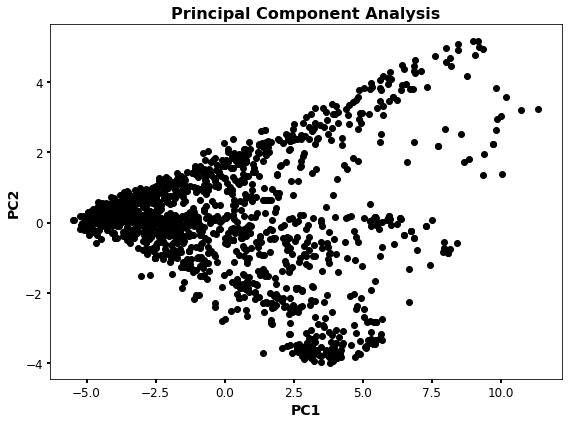

In [ ]:
#print PC1 vs PC2
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(descriptors_pca['PC1'],descriptors_pca['PC2'],'o',color='k')
ax.set_title ('Principal Component Analysis',fontsize=16,fontweight='bold',family='sans-serif')
ax.set_xlabel ('PC1',fontsize=14,fontweight='bold')
ax.set_ylabel ('PC2',fontsize=14,fontweight='bold')

plt.tick_params ('both',width=2,labelsize=12)

plt.tight_layout()
plt.show()

In [ ]:
#Kmean clustering- reescale PCA values from -1 to 1 (Kmeans clustering, necesario reescalar valores)
scale1 = 1.0/(max(descriptors_pca['PC1']) - min(descriptors_pca['PC1']))
scale2 = 1.0/(max(descriptors_pca['PC2']) - min(descriptors_pca['PC2']))

# And we add the new values to our PCA table
descriptors_pca['PC1_normalized']=[i*scale1 for i in descriptors_pca['PC1']]
descriptors_pca['PC2_normalized']=[i*scale2 for i in descriptors_pca['PC2']]

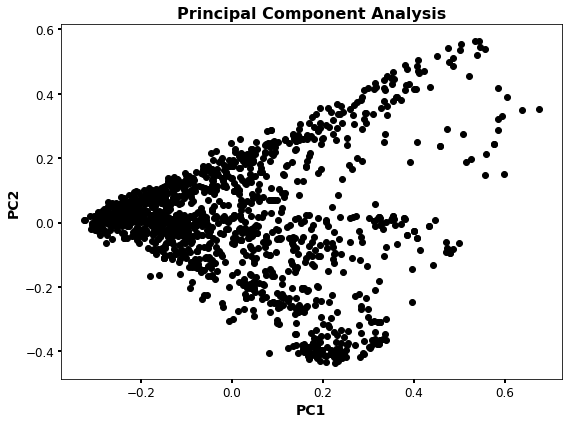

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(descriptors_pca['PC1_normalized'],descriptors_pca['PC2_normalized'],'o',color='k')
ax.set_title ('Principal Component Analysis',fontsize=16,fontweight='bold',family='sans-serif')
ax.set_xlabel ('PC1',fontsize=14,fontweight='bold')
ax.set_ylabel ('PC2',fontsize=14,fontweight='bold')

plt.tick_params ('both',width=2,labelsize=12)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.45794464786589484
For n_clusters = 3 The average silhouette_score is : 0.5350090816513315
For n_clusters = 4 The average silhouette_score is : 0.46138241789466594
For n_clusters = 5 The average silhouette_score is : 0.46205672281710813
For n_clusters = 6 The average silhouette_score is : 0.4626511557661188
For n_clusters = 7 The average silhouette_score is : 0.43498961201542313
For n_clusters = 8 The average silhouette_score is : 0.4386330149570768
For n_clusters = 9 The average silhouette_score is : 0.4512713691938535
For n_clusters = 10 The average silhouette_score is : 0.43896365935967513


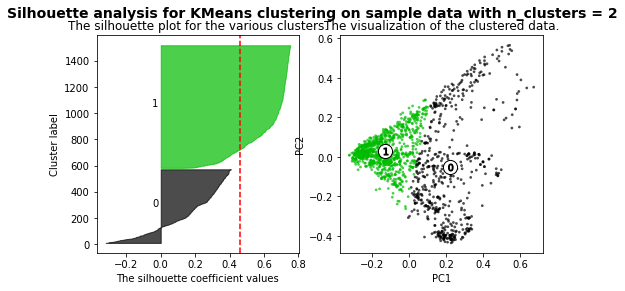

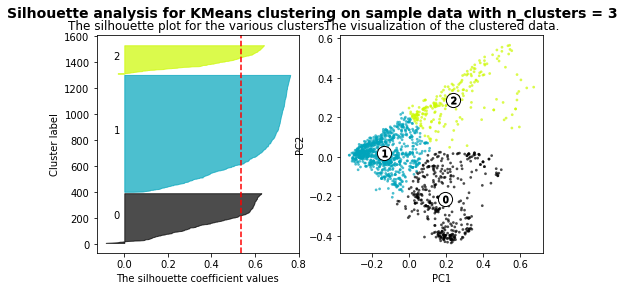

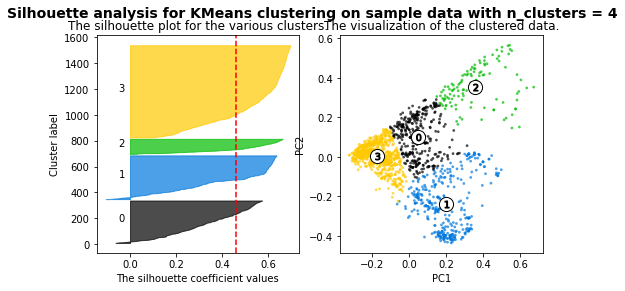

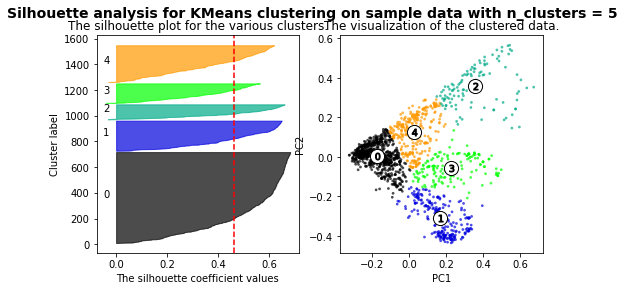

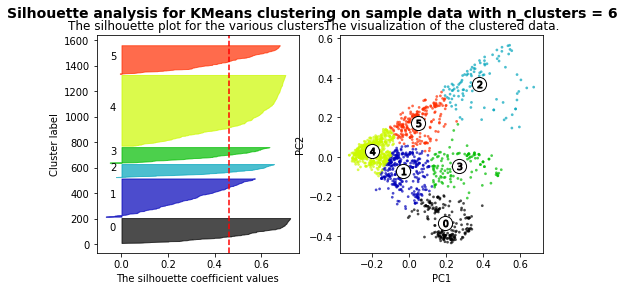

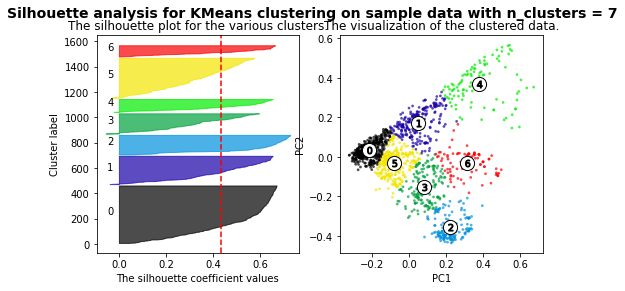

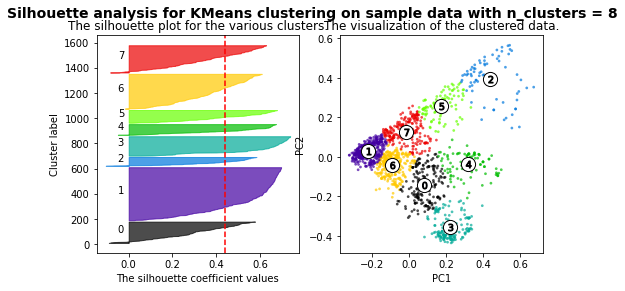

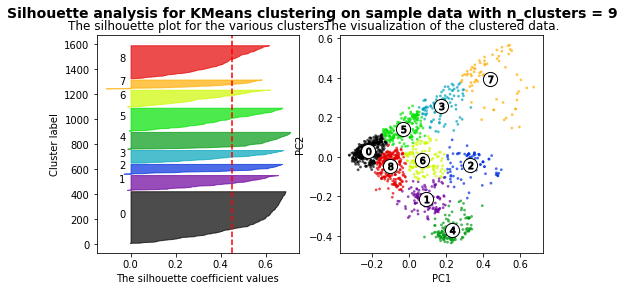

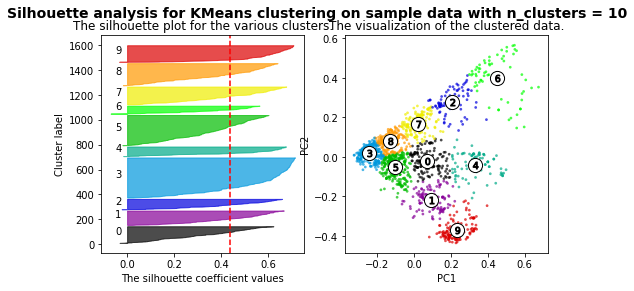

In [ ]:
#silhouette-based algorithm to identify the best number of clusters for our distribution
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n_clusters in range_n_clusters:
    fig, (ax1,ax2)= plt.subplots(1, 2)
    fig.set_size_inches(8, 4)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(descriptors_pca[['PC1_normalized','PC2_normalized']])
    silhouette_avg = silhouette_score(descriptors_pca[['PC1_normalized','PC2_normalized']], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(descriptors_pca[['PC1_normalized','PC2_normalized']], cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")


    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(descriptors_pca['PC1_normalized'], descriptors_pca['PC2_normalized'], 
                marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')


    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    
plt.show()

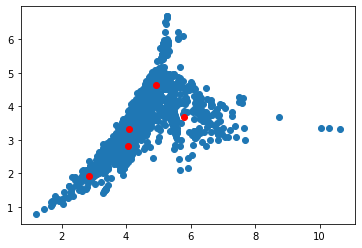

In [ ]:
from numpy import array
from scipy.cluster.vq import vq, kmeans, whiten
import matplotlib.pyplot as plt

whitened = whiten(hmap)
# Find 3 clusters in the data
codebook, distortion = kmeans(whitened, 5)
# Plot whitened data and cluster centers in red
plt.scatter(whitened[:, 0], whitened[:, 1])
plt.scatter(codebook[:, 0], codebook[:, 1], c='r')
plt.show()


In [ ]:
codebook

array([[5.7988872 , 3.68124123, 5.81527171, ..., 2.96714187, 3.48205615,
        4.09296295],
       [4.07249134, 2.81933113, 5.89010346, ..., 4.47268904, 5.01746574,
        3.02746327],
       [2.84502367, 1.92290749, 5.17192757, ..., 2.22577405, 2.51424698,
        2.28414703],
       [4.07732734, 3.33169984, 5.76256089, ..., 2.16875818, 2.84235238,
        3.82376604],
       [4.94300536, 4.64539672, 6.54784343, ..., 2.58348363, 3.47213314,
        4.99738069]])

In [ ]:
###ELBOW METHOD
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn import datasets
#we are usingh
df=pd.DataFrame(hmap)
print(df.head())

       0         1         2     ...      1497      1498      1499
0  1.000000  0.495475  0.301141  ...  0.360445  0.373303  0.429977
1  0.495475  1.000000  0.365950  ...  0.330046  0.439567  0.643375
2  0.301141  0.365950  1.000000  ...  0.315280  0.335570  0.330564
3  0.640390  0.585620  0.327001  ...  0.333818  0.388441  0.525843
4  0.643042  0.476757  0.295120  ...  0.418115  0.412044  0.418903

[5 rows x 1500 columns]


In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

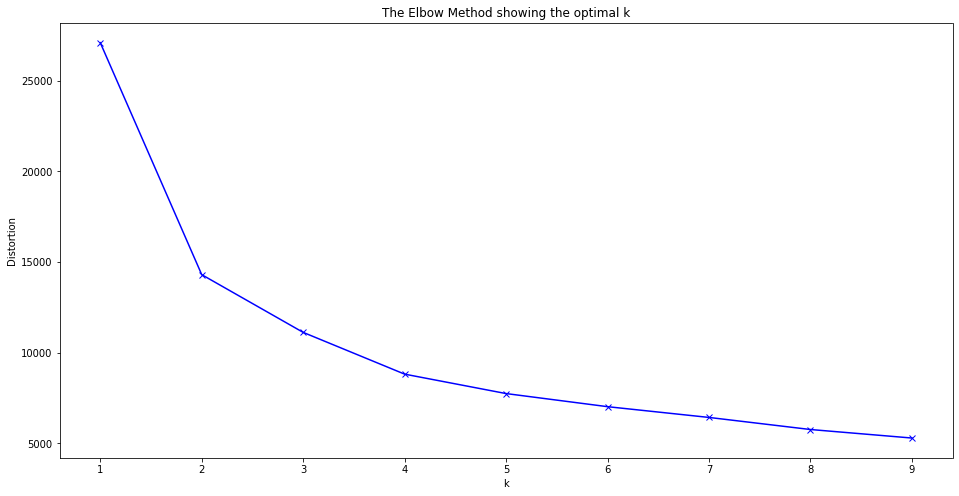

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()